In [1]:
import os

os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant')
# os.chdir('/SVG-ALEX/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/')

import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import glob
import sys
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from spectral_analysis_functions import *
# Using OceanDataLab reader 
#from sentinel2_l1c import *
import numpy as np
from S2_read import *
from s2_angs import *
from scipy.ndimage import zoom

In [2]:
# Charger les tableaux du 27/04/2023
# os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/Californie/27_04_2023_results/Rascle_et_al/Results/')
os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/Californie/27_04_2023_results/Rascle_et_al/Results/X_band/')

# os.chdir('Californie/27_04_2023_results/Rascle_et_al/Results/')

U_BF = np.load('U_BF.npy')
V_BF = np.load('V_BF.npy')

lat_BF=np.load('lat_BF.npy')
lon_BF=np.load('lon_BF.npy')

C_BF=np.load('C_BF.npy')

#BG
# U_BG = np.load('U_BG.npy')
# V_BG = np.load('V_BG.npy')

# lat_BG=np.load('lat_BG.npy')
# lon_BG=np.load('lon_BG.npy')

# C_BG=np.load('C_BG.npy')

# #BH
# U_BH = np.load('U_BH.npy')
# V_BH = np.load('V_BH.npy')

# lat_BH=np.load('lat_BH.npy')
# lon_BH=np.load('lon_BH.npy')

# C_BH=np.load('C_BH.npy')

# CF

U_CF = np.load('U_CF.npy')
V_CF = np.load('V_CF.npy')

lat_CF=np.load('lat_CF.npy')
lon_CF=np.load('lon_CF.npy')

C_CF=np.load('C_CF.npy')

#CG

U_CG = np.load('U_CG.npy')
V_CG = np.load('V_CG.npy')

lat_CG=np.load('lat_CG.npy')
lon_CG=np.load('lon_CG.npy')

C_CG=np.load('C_CG.npy')

#CJ

# U_CJ = np.load('U_CJ.npy')
# V_CJ = np.load('V_CJ.npy')

# lat_CJ=np.load('lat_CJ.npy')
# lon_CJ=np.load('lon_CJ.npy')

# C_CJ=np.load('C_CJ.npy')
# #CH

# U_CH = np.load('U_CH.npy')
# V_CH = np.load('V_CH.npy')

# lat_CH=np.load('lat_CH.npy')
# lon_CH=np.load('lon_CH.npy')

# C_CH=np.load('C_CH.npy')

# # DF

# U_DF = np.load('U_DF.npy')
# V_DF = np.load('V_DF.npy')

# lat_DF=np.load('lat_DF.npy')
# lon_DF=np.load('lon_DF.npy')

# C_DF=np.load('C_DF.npy')

# #DG

# U_DG = np.load('U_DG.npy')
# V_DG = np.load('V_DG.npy')

# lat_DG=np.load('lat_DG.npy')
# lon_DG=np.load('lon_DG.npy')

# C_DG=np.load('C_DG.npy')

# #DH

# U_DH = np.load('U_DH.npy')
# V_DH = np.load('V_DH.npy')

# lat_DH=np.load('lat_DH.npy')
# lon_DH=np.load('lon_DH.npy')

# C_DH=np.load('C_DH.npy')

In [3]:
# Fonction de filtrage par magnitude
def filter_vectors(lon, lat, U, V, C, threshold):
    magnitude = np.sqrt(U**2 + V**2)
    mask = magnitude <= threshold
    return lon[mask], lat[mask], U[mask], V[mask], C[mask]

magnitude_threshold = 1  # Ajuster ce seuil en fonction des données

In [4]:
lon_BF10, lat_BF10, U_BF10, V_BF10, C_BF10 = filter_vectors(lon_BF, lat_BF, U_BF, V_BF, C_BF, magnitude_threshold)
# lon_BG10, lat_BG10, U_BG10, V_BG10, C_BG10 = filter_vectors(lon_BG, lat_BG, U_BG, V_BG, C_BG, magnitude_threshold)
# lon_BH10, lat_BH10, U_BH10, V_BH10, C_BH10 = filter_vectors(lon_BH, lat_BH, U_BH, V_BH, C_BH, magnitude_threshold)

lon_CF10, lat_CF10, U_CF10, V_CF10, C_CF10 = filter_vectors(lon_CF, lat_CF, U_CF, V_CF, C_CF, magnitude_threshold)
lon_CG10, lat_CG10, U_CG10, V_CG10, C_CG10 = filter_vectors(lon_CG, lat_CG, U_CG, V_CG, C_CG, magnitude_threshold)
# lon_CJ10, lat_CJ10, U_CJ10, V_CJ10, C_CJ10 = filter_vectors(lon_CJ, lat_CJ, U_CJ, V_CJ, C_CJ, magnitude_threshold)
# lon_CH10, lat_CH10, U_CH10, V_CH10, C_CH10 = filter_vectors(lon_CH, lat_CH, U_CH, V_CH, C_CH, magnitude_threshold)

# lon_DF10, lat_DF10, U_DF10, V_DF10, C_DF10 = filter_vectors(lon_DF, lat_DF, U_DF, V_DF, C_DF, magnitude_threshold)
# lon_DG10, lat_DG10, U_DG10, V_DG10, C_DG10 = filter_vectors(lon_DG, lat_DG, U_DG, V_DG, C_DG, magnitude_threshold)
# lon_DH10, lat_DH10, U_DH10, V_DH10, C_DH10 = filter_vectors(lon_DH, lat_DH, U_DH, V_DH, C_DH, magnitude_threshold)

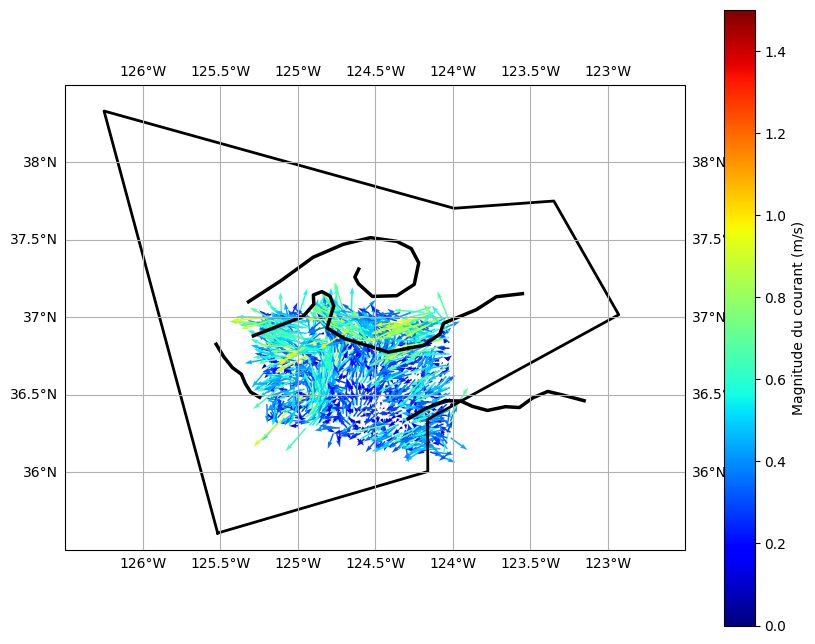

In [5]:
# Coordonnées KML et fronts
KML = [-125.5154580984717,35.60918144273914,0, -124.1598348200598,36.00632011592869,0, -124.1611160975969,36.34271033966335,0, -122.9280238314868,37.01787765651094,0, -123.3466687946642,37.75153911575246,0, -123.990921381546,37.70457834777174,0, -126.2484625922921,38.33213496721693,0, -125.5154580984717,35.60918144273914,0]
kml = [KML[i:i+3] for i in range(0, len(KML), 3)]
x = [point[0] for point in kml]
y = [point[1] for point in kml]

front1 = [
    [-125.285339, 36.881818], [-124.963989, 37.006939], [-124.895325, 37.085858], 
    [-124.898071, 37.144993], [-124.84314, 37.166883], [-124.790955, 37.138425], 
    [-124.766235, 37.074902], [-124.810181, 36.93233], [-124.697571, 36.86424], 
    [-124.414673, 36.776292], [-124.186707, 36.820279], [-124.082336, 36.892801], 
    [-124.057617, 36.96306], [-123.84613, 37.050793], [-123.717041, 37.134045], 
    [-123.5495, 37.15375]
]

front2 = [
    [-125.316925, 37.101194], [-125.108185, 37.236889], [-124.899445, 37.388709], 
    [-124.707184, 37.471588], [-124.530029, 37.515172], [-124.359741, 37.491204], 
    [-124.266357, 37.444335], [-124.218292, 37.352693], [-124.247131, 37.213925], 
    [-124.359741, 37.140614], [-124.51767, 37.136235], [-124.606934, 37.217206], 
    [-124.63028, 37.260938], [-124.60556, 37.312291]
]

front3 = [
    [-124.285583, 36.346103], [-124.177094, 36.411336], [-124.048004, 36.463263], 
    [-123.946381, 36.461054], [-123.872223, 36.426808], [-123.774719, 36.400284], 
    [-123.659363, 36.424598], [-123.568726, 36.419072], [-123.483582, 36.480932], 
    [-123.386078, 36.522881], [-123.288574, 36.499701], [-123.151245, 36.463263]
]

front4 = [
    [-125.524979, 36.827424], [-125.47554, 36.745487], [-125.420609, 36.67668], 
    [-125.36293, 36.634264], [-125.336838, 36.572527], [-125.303192, 36.519018], 
    [-125.244827, 36.485349]
]

thick = 0.003
nb_pt = 1
scale_quiver = 13
width_front = 2.5

# plt.figure(figsize=(14, 12))

# # Tracé des lignes définies par les coordonnées KML

# Fonction pour extraire les coordonnées x et y
def extract_coords(front):
    x_coords = [point[0] for point in front]
    y_coords = [point[1] for point in front]
    return x_coords, y_coords

vmin=0
vmax=1.5

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Tracer les fronts
plt.plot(x, y, 'k', linewidth=2,transform=ccrs.PlateCarree())

x1, y1 = extract_coords(front1)
plt.plot(x1, y1, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x2, y2 = extract_coords(front2)
plt.plot(x2, y2, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x3, y3 = extract_coords(front3)
plt.plot(x3, y3, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x4, y4 = extract_coords(front4)
plt.plot(x4, y4, 'k', linewidth=width_front,transform=ccrs.PlateCarree())


# q1 = plt.quiver(lon_BF10[::2], lat_BF10[::2], U_BF10[::2], V_BF10[::2], C_BF10[::2],scale=scale_quiver,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
# q2 = plt.quiver(lon_BG10, lat_BG10, U_BG10, V_BG10, C_BG10,scale=scale_quiver,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
# q3 = plt.quiver(lon_BH10, lat_BH10, U_BH10, V_BH10, C_BH10,scale=scale_quiver,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
q4 = plt.quiver(lon_CF10[::2], lat_CF10[::2], U_CF10[::2], V_CF10[::2], C_CF10[::2],scale=scale_quiver,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
# q5 = plt.quiver(lon_CG10[::2], lat_CG10[::2], U_CG10[::2], V_CG10[::2], C_CG10[::2],scale=scale_quiver,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
# q6 = plt.quiver(lon_CJ10, lat_CJ10, U_CJ10, V_CJ10, C_CJ10,scale=scale_quiver,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
# q7 = plt.quiver(lon_CH10, lat_CH10, U_CH10, V_CH10, C_CH10,scale=scale_quiver,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
# q8 = plt.quiver(lon_DF10, lat_DF10, U_DF10, V_DF10, C_DF10,scale=scale_quiver,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
# q9 = plt.quiver(lon_DG10, lat_DG10, U_DG10, V_DG10, C_DG10,scale=scale_quiver,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
# q10 = plt.quiver(lon_DH10, lat_DH10, U_DH10, V_DH10, C_DH10,scale=scale_quiver,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 

# plt.scatter(LON, LAT, color='grey', marker='.', alpha=0.5, label='Points (LON, LAT)', transform=ccrs.PlateCarree()) 


norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])
# Ajouter la colorbar globale à la figure
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Magnitude du courant (m/s)')

plt.xlim(-126.5, -122.5)
plt.ylim(35.5, 38.5)
# Ajouter une grille
ax.gridlines(draw_labels=True)

# Affichage de la carte
plt.show()

### Autre représentation

In [6]:
# Normalisation

U_BF_norm=U_BF10/C_BF10
V_BF_norm=V_BF10/C_BF10

U_CF_norm=U_CF10/C_CF10
V_CF_norm=V_CF10/C_CF10

U_CG_norm=U_CG10/C_CG10
V_CG_norm=V_CG10/C_CG10


/tmp/ipykernel_154580/517421908.py:3: RuntimeWarning: invalid value encountered in divide
  U_BF_norm=U_BF10/C_BF10
/tmp/ipykernel_154580/517421908.py:4: RuntimeWarning: invalid value encountered in divide
  V_BF_norm=V_BF10/C_BF10
/tmp/ipykernel_154580/517421908.py:6: RuntimeWarning: invalid value encountered in divide
  U_CF_norm=U_CF10/C_CF10
/tmp/ipykernel_154580/517421908.py:7: RuntimeWarning: invalid value encountered in divide
  V_CF_norm=V_CF10/C_CF10
/tmp/ipykernel_154580/517421908.py:9: RuntimeWarning: invalid value encountered in divide
  U_CG_norm=U_CG10/C_CG10
/tmp/ipykernel_154580/517421908.py:10: RuntimeWarning: invalid value encountered in divide
  V_CG_norm=V_CG10/C_CG10


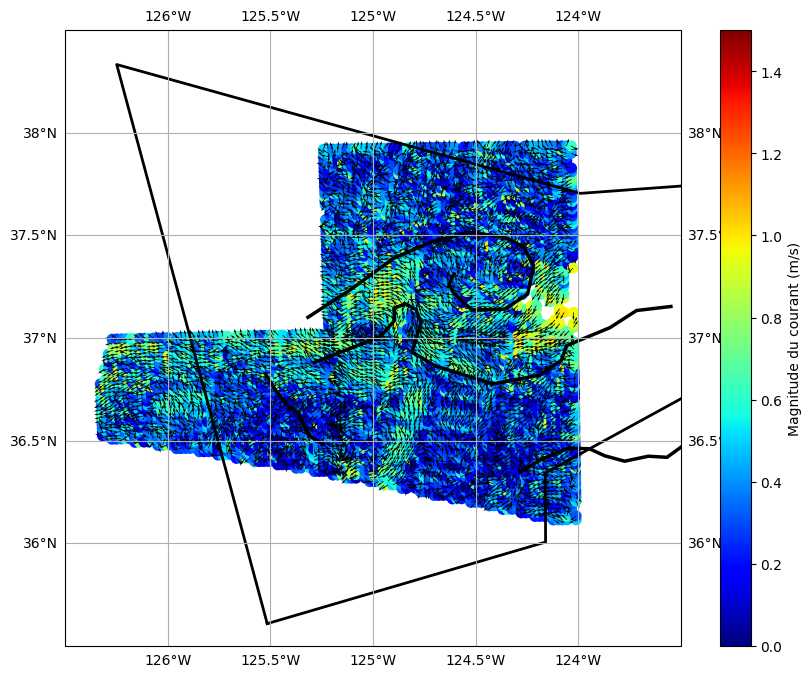

In [7]:
# Coordonnées KML et fronts
KML = [-125.5154580984717,35.60918144273914,0, -124.1598348200598,36.00632011592869,0, -124.1611160975969,36.34271033966335,0, -122.9280238314868,37.01787765651094,0, -123.3466687946642,37.75153911575246,0, -123.990921381546,37.70457834777174,0, -126.2484625922921,38.33213496721693,0, -125.5154580984717,35.60918144273914,0]
kml = [KML[i:i+3] for i in range(0, len(KML), 3)]
x = [point[0] for point in kml]
y = [point[1] for point in kml]

front1 = [
    [-125.285339, 36.881818], [-124.963989, 37.006939], [-124.895325, 37.085858], 
    [-124.898071, 37.144993], [-124.84314, 37.166883], [-124.790955, 37.138425], 
    [-124.766235, 37.074902], [-124.810181, 36.93233], [-124.697571, 36.86424], 
    [-124.414673, 36.776292], [-124.186707, 36.820279], [-124.082336, 36.892801], 
    [-124.057617, 36.96306], [-123.84613, 37.050793], [-123.717041, 37.134045], 
    [-123.5495, 37.15375]
]

front2 = [
    [-125.316925, 37.101194], [-125.108185, 37.236889], [-124.899445, 37.388709], 
    [-124.707184, 37.471588], [-124.530029, 37.515172], [-124.359741, 37.491204], 
    [-124.266357, 37.444335], [-124.218292, 37.352693], [-124.247131, 37.213925], 
    [-124.359741, 37.140614], [-124.51767, 37.136235], [-124.606934, 37.217206], 
    [-124.63028, 37.260938], [-124.60556, 37.312291]
]

front3 = [
    [-124.285583, 36.346103], [-124.177094, 36.411336], [-124.048004, 36.463263], 
    [-123.946381, 36.461054], [-123.872223, 36.426808], [-123.774719, 36.400284], 
    [-123.659363, 36.424598], [-123.568726, 36.419072], [-123.483582, 36.480932], 
    [-123.386078, 36.522881], [-123.288574, 36.499701], [-123.151245, 36.463263]
]

front4 = [
    [-125.524979, 36.827424], [-125.47554, 36.745487], [-125.420609, 36.67668], 
    [-125.36293, 36.634264], [-125.336838, 36.572527], [-125.303192, 36.519018], 
    [-125.244827, 36.485349]
]

thick = 0.0012
nb_pt = 1
scale_quiver = 80
width_front = 2.5
size=50

# plt.figure(figsize=(14, 12))

# # Tracé des lignes définies par les coordonnées KML

# Fonction pour extraire les coordonnées x et y
def extract_coords(front):
    x_coords = [point[0] for point in front]
    y_coords = [point[1] for point in front]
    return x_coords, y_coords

vmin=0
vmax=1.5

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Tracer les fronts
plt.plot(x, y, 'k', linewidth=2,transform=ccrs.PlateCarree())

x1, y1 = extract_coords(front1)
plt.plot(x1, y1, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x2, y2 = extract_coords(front2)
plt.plot(x2, y2, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x3, y3 = extract_coords(front3)
plt.plot(x3, y3, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x4, y4 = extract_coords(front4)
plt.plot(x4, y4, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

sc1=plt.scatter(lon_BF10, lat_BF10,c=C_BF10, cmap='jet',clim=(vmin, vmax), s=size,transform=ccrs.PlateCarree())
sc2=plt.scatter(lon_CF10, lat_CF10,c=C_CF10, cmap='jet',clim=(vmin, vmax), s=size,transform=ccrs.PlateCarree())
sc3=plt.scatter(lon_CG10, lat_CG10,c=C_CG10, cmap='jet',clim=(vmin, vmax), s=size,transform=ccrs.PlateCarree())


q1 = plt.quiver(lon_BF10, lat_BF10, U_BF_norm, V_BF_norm,scale=scale_quiver,width=thick,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
q4 = plt.quiver(lon_CF10, lat_CF10, U_CF_norm, V_CF_norm,scale=scale_quiver,width=thick,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
q5 = plt.quiver(lon_CG10, lat_CG10, U_CG_norm, V_CG_norm,scale=scale_quiver,width=thick,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 


norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])
# Ajouter la colorbar globale à la figure
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Magnitude du courant (m/s)')

plt.xlim(-126.5, -123.5)
plt.ylim(35.5, 38.5)
# Ajouter une grille
ax.gridlines(draw_labels=True)
plt.savefig('box_200.png')
# Affichage de la carte
plt.show()

In [8]:
os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/')
# os.chdir('/SVG-ALEX/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/')

import scipy.io
from scipy.io import savemat
Nicolas_file = scipy.io.loadmat('S2_20230427_B4-DALL_ls8_results_current_NEW_coh6_eps1_eps2_km15.mat')
# savemat('data_L1C.mat',{'UU':UU,'UV':UV,'lon':lon_L1C,'lat':lat_L1C})
print(Nicolas_file.keys())
LAT = Nicolas_file.get("lat")
LON=Nicolas_file.get("lon")
UU=Nicolas_file.get("u")
VV=Nicolas_file.get("v")

LAT=LAT.flatten()
LON=LON.flatten()
UU=UU.flatten()
VV=VV.flatten()

print('LAT',np.shape(LAT))
print('LON',np.shape(LON))
print('UU',np.shape(UU))
print('VV',np.shape(VV))

CC=np.sqrt(UU**2+VV**2)



dict_keys(['__header__', '__version__', '__globals__', 'lat', 'lon', 'u', 'v'])
LAT (816,)
LON (816,)
UU (816,)
VV (816,)


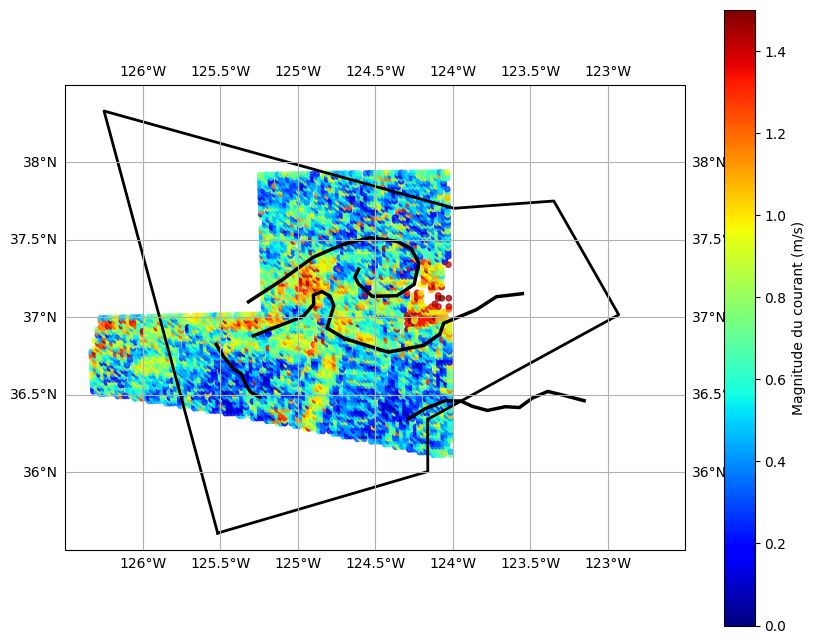

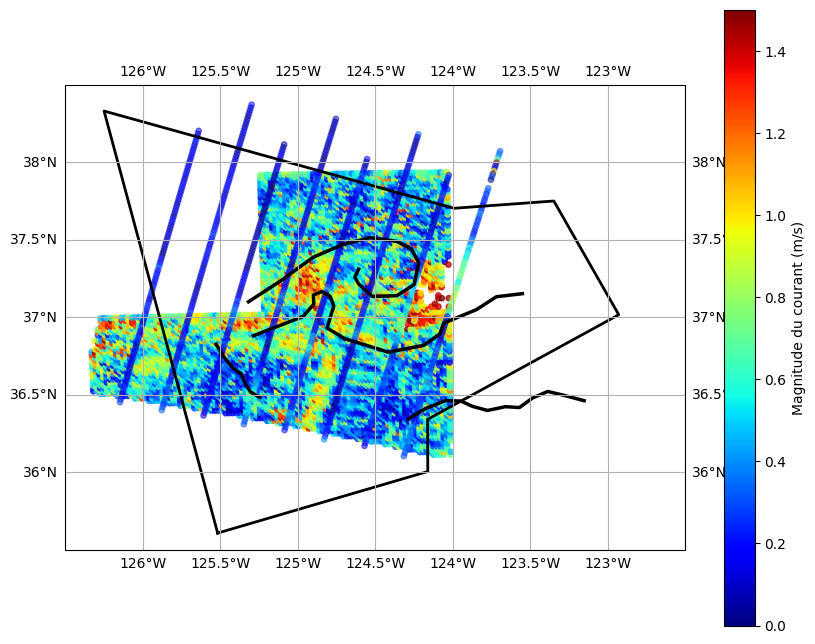

In [9]:
# Représentation en scatter plot d'intensité

# Coordonnées KML et fronts
KML = [-125.5154580984717,35.60918144273914,0, -124.1598348200598,36.00632011592869,0, -124.1611160975969,36.34271033966335,0, -122.9280238314868,37.01787765651094,0, -123.3466687946642,37.75153911575246,0, -123.990921381546,37.70457834777174,0, -126.2484625922921,38.33213496721693,0, -125.5154580984717,35.60918144273914,0]
kml = [KML[i:i+3] for i in range(0, len(KML), 3)]
x = [point[0] for point in kml]
y = [point[1] for point in kml]

front1 = [
    [-125.285339, 36.881818], [-124.963989, 37.006939], [-124.895325, 37.085858], 
    [-124.898071, 37.144993], [-124.84314, 37.166883], [-124.790955, 37.138425], 
    [-124.766235, 37.074902], [-124.810181, 36.93233], [-124.697571, 36.86424], 
    [-124.414673, 36.776292], [-124.186707, 36.820279], [-124.082336, 36.892801], 
    [-124.057617, 36.96306], [-123.84613, 37.050793], [-123.717041, 37.134045], 
    [-123.5495, 37.15375]
]

front2 = [
    [-125.316925, 37.101194], [-125.108185, 37.236889], [-124.899445, 37.388709], 
    [-124.707184, 37.471588], [-124.530029, 37.515172], [-124.359741, 37.491204], 
    [-124.266357, 37.444335], [-124.218292, 37.352693], [-124.247131, 37.213925], 
    [-124.359741, 37.140614], [-124.51767, 37.136235], [-124.606934, 37.217206], 
    [-124.63028, 37.260938], [-124.60556, 37.312291]
]

front3 = [
    [-124.285583, 36.346103], [-124.177094, 36.411336], [-124.048004, 36.463263], 
    [-123.946381, 36.461054], [-123.872223, 36.426808], [-123.774719, 36.400284], 
    [-123.659363, 36.424598], [-123.568726, 36.419072], [-123.483582, 36.480932], 
    [-123.386078, 36.522881], [-123.288574, 36.499701], [-123.151245, 36.463263]
]

front4 = [
    [-125.524979, 36.827424], [-125.47554, 36.745487], [-125.420609, 36.67668], 
    [-125.36293, 36.634264], [-125.336838, 36.572527], [-125.303192, 36.519018], 
    [-125.244827, 36.485349]
]

thick = 0.003
nb_pt = 1
scale_quiver = 13
width_front = 2.5

# plt.figure(figsize=(14, 12))

# # Tracé des lignes définies par les coordonnées KML

# Fonction pour extraire les coordonnées x et y
def extract_coords(front):
    x_coords = [point[0] for point in front]
    y_coords = [point[1] for point in front]
    return x_coords, y_coords

vmin=0
vmax=1.5

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Tracer les fronts
plt.plot(x, y, 'k', linewidth=2,transform=ccrs.PlateCarree())

x1, y1 = extract_coords(front1)
plt.plot(x1, y1, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x2, y2 = extract_coords(front2)
plt.plot(x2, y2, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x3, y3 = extract_coords(front3)
plt.plot(x3, y3, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x4, y4 = extract_coords(front4)
plt.plot(x4, y4, 'k', linewidth=width_front,transform=ccrs.PlateCarree())


sc1 = plt.scatter(lon_BF10, lat_BF10, c=C_BF10, s=15, cmap='jet', alpha=0.75,transform=ccrs.PlateCarree())
# sc2 = plt.scatter(lon_BG10, lat_BG10, c=C_BG10, s=15, cmap='jet', alpha=0.75,transform=ccrs.PlateCarree())
# sc3 = plt.scatter(lon_BH10, lat_BH10, c=C_BH10, s=15, cmap='jet', alpha=0.75,transform=ccrs.PlateCarree())
sc4 = plt.scatter(lon_CF10, lat_CF10, c=C_CF10, s=15, cmap='jet', alpha=0.75,transform=ccrs.PlateCarree())
sc5 = plt.scatter(lon_CG10, lat_CG10, c=C_CG10, s=15, cmap='jet', alpha=0.75,transform=ccrs.PlateCarree())
# sc6 = plt.scatter(lon_CH10, lat_CH10, c=C_CH10, s=15, cmap='jet', alpha=0.75,transform=ccrs.PlateCarree())
# sc7 = plt.scatter(lon_CJ10, lat_CJ10, c=C_CJ10, s=15, cmap='jet', alpha=0.75,transform=ccrs.PlateCarree())
# sc8 = plt.scatter(lon_DF10, lat_DF10, c=C_DF10, s=15, cmap='jet', alpha=0.75,transform=ccrs.PlateCarree())
# sc9 = plt.scatter(lon_DG10, lat_DG10, c=C_DG10, s=15, cmap='jet', alpha=0.75,transform=ccrs.PlateCarree())
# sc10 = plt.scatter(lon_DH10, lat_DH10, c=C_DH10, s=15, cmap='jet', alpha=0.75,transform=ccrs.PlateCarree())

# plt.scatter(LON,LAT, c="gray", s=15, alpha=0.5, transform=ccrs.PlateCarree())
# plt.scatter(LON,LAT, c=CC, s=15, alpha=0.5, cmap='jet',transform=ccrs.PlateCarree())



norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])
# Ajouter la colorbar globale à la figure
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Magnitude du courant (m/s)')

plt.xlim(-126.5, -122.5)
plt.ylim(35.5, 38.5)
# Ajouter une grille
ax.gridlines(draw_labels=True)
# plt.savefig('L1C_L1B.png')
# Affichage de la carte
plt.show()

#################################################################################################################################

# Coordonnées KML et fronts
KML = [-125.5154580984717,35.60918144273914,0, -124.1598348200598,36.00632011592869,0, -124.1611160975969,36.34271033966335,0, -122.9280238314868,37.01787765651094,0, -123.3466687946642,37.75153911575246,0, -123.990921381546,37.70457834777174,0, -126.2484625922921,38.33213496721693,0, -125.5154580984717,35.60918144273914,0]
kml = [KML[i:i+3] for i in range(0, len(KML), 3)]
x = [point[0] for point in kml]
y = [point[1] for point in kml]

front1 = [
    [-125.285339, 36.881818], [-124.963989, 37.006939], [-124.895325, 37.085858], 
    [-124.898071, 37.144993], [-124.84314, 37.166883], [-124.790955, 37.138425], 
    [-124.766235, 37.074902], [-124.810181, 36.93233], [-124.697571, 36.86424], 
    [-124.414673, 36.776292], [-124.186707, 36.820279], [-124.082336, 36.892801], 
    [-124.057617, 36.96306], [-123.84613, 37.050793], [-123.717041, 37.134045], 
    [-123.5495, 37.15375]
]

front2 = [
    [-125.316925, 37.101194], [-125.108185, 37.236889], [-124.899445, 37.388709], 
    [-124.707184, 37.471588], [-124.530029, 37.515172], [-124.359741, 37.491204], 
    [-124.266357, 37.444335], [-124.218292, 37.352693], [-124.247131, 37.213925], 
    [-124.359741, 37.140614], [-124.51767, 37.136235], [-124.606934, 37.217206], 
    [-124.63028, 37.260938], [-124.60556, 37.312291]
]

front3 = [
    [-124.285583, 36.346103], [-124.177094, 36.411336], [-124.048004, 36.463263], 
    [-123.946381, 36.461054], [-123.872223, 36.426808], [-123.774719, 36.400284], 
    [-123.659363, 36.424598], [-123.568726, 36.419072], [-123.483582, 36.480932], 
    [-123.386078, 36.522881], [-123.288574, 36.499701], [-123.151245, 36.463263]
]

front4 = [
    [-125.524979, 36.827424], [-125.47554, 36.745487], [-125.420609, 36.67668], 
    [-125.36293, 36.634264], [-125.336838, 36.572527], [-125.303192, 36.519018], 
    [-125.244827, 36.485349]
]

thick = 0.003
nb_pt = 1
scale_quiver = 15
width_front = 2.5

# plt.figure(figsize=(14, 12))

# # Tracé des lignes définies par les coordonnées KML

# Fonction pour extraire les coordonnées x et y
def extract_coords(front):
    x_coords = [point[0] for point in front]
    y_coords = [point[1] for point in front]
    return x_coords, y_coords

vmin=0
vmax=1.5

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Tracer les fronts
plt.plot(x, y, 'k', linewidth=2,transform=ccrs.PlateCarree())

x1, y1 = extract_coords(front1)
plt.plot(x1, y1, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x2, y2 = extract_coords(front2)
plt.plot(x2, y2, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x3, y3 = extract_coords(front3)
plt.plot(x3, y3, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x4, y4 = extract_coords(front4)
plt.plot(x4, y4, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

sc1 = plt.scatter(lon_BF10, lat_BF10, c=C_BF10, s=15, cmap='jet', alpha=0.75,transform=ccrs.PlateCarree())
# sc2 = plt.scatter(lon_BG10, lat_BG10, c=C_BG10, s=15, cmap='jet', alpha=0.75,transform=ccrs.PlateCarree())
# sc3 = plt.scatter(lon_BH10, lat_BH10, c=C_BH10, s=15, cmap='jet', alpha=0.75,transform=ccrs.PlateCarree())
sc4 = plt.scatter(lon_CF10, lat_CF10, c=C_CF10, s=15, cmap='jet', alpha=0.75,transform=ccrs.PlateCarree())
sc5 = plt.scatter(lon_CG10, lat_CG10, c=C_CG10, s=15, cmap='jet', alpha=0.75,transform=ccrs.PlateCarree())
# sc6 = plt.scatter(lon_CH10, lat_CH10, c=C_CH10, s=15, cmap='jet', alpha=0.75,transform=ccrs.PlateCarree())
# sc7 = plt.scatter(lon_CJ10, lat_CJ10, c=C_CJ10, s=15, cmap='jet', alpha=0.75,transform=ccrs.PlateCarree())
# sc8 = plt.scatter(lon_DF10, lat_DF10, c=C_DF10, s=15, cmap='jet', alpha=0.75,transform=ccrs.PlateCarree())
# sc9 = plt.scatter(lon_DG10, lat_DG10, c=C_DG10, s=15, cmap='jet', alpha=0.75,transform=ccrs.PlateCarree())
# sc10 = plt.scatter(lon_DH10, lat_DH10, c=C_DH10, s=15, cmap='jet', alpha=0.75,transform=ccrs.PlateCarree())

# plt.scatter(LON,LAT, c="gray", s=15, alpha=0.5, transform=ccrs.PlateCarree())
plt.scatter(LON,LAT, c=CC, s=15, alpha=0.5, cmap='jet',transform=ccrs.PlateCarree())


norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])
# Ajouter la colorbar globale à la figure
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Magnitude du courant (m/s)')

plt.xlim(-126.5, -122.5)
plt.ylim(35.5, 38.5)
# Ajouter une grille
ax.gridlines(draw_labels=True)
# plt.savefig('L1C_L1B.png')
# Affichage de la carte
plt.show()

